In [170]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [171]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [172]:
import re
result_df = pd.json_normalize(result_file['results'])
result_df.rename(columns=lambda c: re.sub(r'^config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df.head()

max_possible_throughput  expected_throughput  avg_throughput  \
0                 1.333333             0.133333        0.133969   
1                 1.333333             0.133333        0.135156   
2                 1.333333             0.133333        0.133697   
3                 1.333333             0.133333        0.118744   
4                 1.333333             0.133333        0.131341   

                        controller  \
0  <class 'DQNLearner.DQNLearner'>   
1  <class 'DQNLearner.DQNLearner'>   
2  <class 'DQNLearner.DQNLearner'>   
3  <class 'DQNLearner.DQNLearner'>   
4  <class 'DQNLearner.DQNLearner'>   

                                   controller_config model_file  \
0  {'reward_function': <function unique_packets a...    31.json   
1  {'reward_function': <function unique_packets a...    31.json   
2  {'reward_function': <function unique_packets a...    31.json   
3  {'reward_function': <function unique_packets a...    31.json   
4  {'reward_function': <function unique_packets a...    31.json   

                                               state mission_size num_agents  \
0  <class 'state.CommunicationMobilityPacketsState'>            5          1   
1  <class 'state.CommunicationMobilityPacketsState'>            5          1   
2  <class 'state.CommunicationMobilityPacketsState'>            5          1   
3  <class 'state.CommunicationMobilityPacketsState'>            5          1   
4  <class 'state.CommunicationMobilityPacketsState'>            5          1   

  sensor_generation_frequency  ... sensor_packet_lifecycle  \
0                           3  ...                     inf   
1                           3  ...                     inf   
2                           3  ...                     inf   
3                           3  ...                     inf   
4                           3  ...                     inf   

  maximum_simulation_steps training testing_repetitions step_by_step  plots  \
0                  1000000     True                   5        False  False   
1                   300000    False                   5        False  False   
2                   350000    False                   5        False  False   
3                   350000    False                   5        False  False   
4                   350000    False                   5        False  False   

  verbose live_testing_frequency repetitions controller.avg_reward  
0   False                  50000           3              0.086686  
1   False                  50000           3              0.124900  
2   False                  50000           3              0.124900  
3   False                  50000           3              0.124900  
4   False                  50000           3              0.124900  

[5 rows x 21 columns]

In [173]:
variable_columns = result_file['campaign_variables']
variable_columns

['repetitions', 'num_agents', 'mission_size', 'controller_config', 'training']

In [174]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

campaign_id  max_possible_throughput  expected_throughput  avg_throughput  \
0            0                 1.333333             0.133333        0.133969   
1            1                 1.333333             0.133333        0.135156   
2            2                 1.333333             0.133333        0.133697   
3            3                 1.333333             0.133333        0.118744   
4            4                 1.333333             0.133333        0.131341   

                        controller  \
0  <class 'DQNLearner.DQNLearner'>   
1  <class 'DQNLearner.DQNLearner'>   
2  <class 'DQNLearner.DQNLearner'>   
3  <class 'DQNLearner.DQNLearner'>   
4  <class 'DQNLearner.DQNLearner'>   

                                   controller_config model_file  \
0  {'reward_function': <function unique_packets a...    31.json   
1  {'reward_function': <function unique_packets a...    31.json   
2  {'reward_function': <function unique_packets a...    31.json   
3  {'reward_function': <function unique_packets a...    31.json   
4  {'reward_function': <function unique_packets a...    31.json   

                                               state mission_size num_agents  \
0  <class 'state.CommunicationMobilityPacketsState'>            5          1   
1  <class 'state.CommunicationMobilityPacketsState'>            5          1   
2  <class 'state.CommunicationMobilityPacketsState'>            5          1   
3  <class 'state.CommunicationMobilityPacketsState'>            5          1   
4  <class 'state.CommunicationMobilityPacketsState'>            5          1   

   ... sensor_packet_lifecycle maximum_simulation_steps training  \
0  ...                     inf                  1000000     True   
1  ...                     inf                   300000    False   
2  ...                     inf                   350000    False   
3  ...                     inf                   350000    False   
4  ...                     inf                   350000    False   

  testing_repetitions step_by_step  plots verbose live_testing_frequency  \
0                   5        False  False   False                  50000   
1                   5        False  False   False                  50000   
2                   5        False  False   False                  50000   
3                   5        False  False   False                  50000   
4                   5        False  False   False                  50000   

  repetitions controller.avg_reward  
0           3              0.086686  
1           3              0.124900  
2           3              0.124900  
3           3              0.124900  
4           3              0.124900  

[5 rows x 22 columns]

In [175]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['expected_throughput'],
    name='Expected Throughput',
    hovertemplate='<b>Expected Throughput: %{y}</b><extra></extra>'
))


campaign_hovertemplate = '<b>Avg. Throughput: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['avg_throughput'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(len(result_df))],
   tickvals=[i for i in range(len(result_df))],
)

fig.show()

In [176]:
result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [177]:
fig = go.Figure()

campaign_hovertemplate = '<b>Score: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['score'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(24)],
   tickvals=[i for i in range(24)],
)

fig.show()

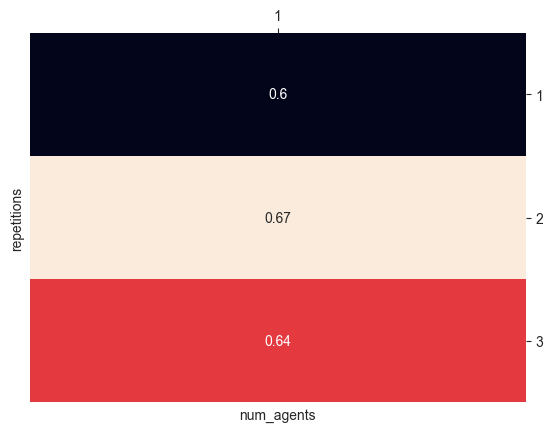

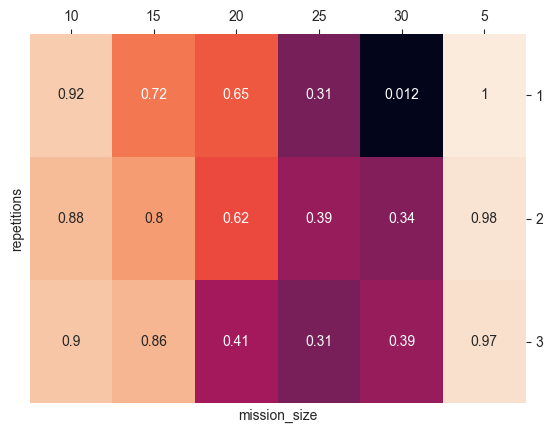

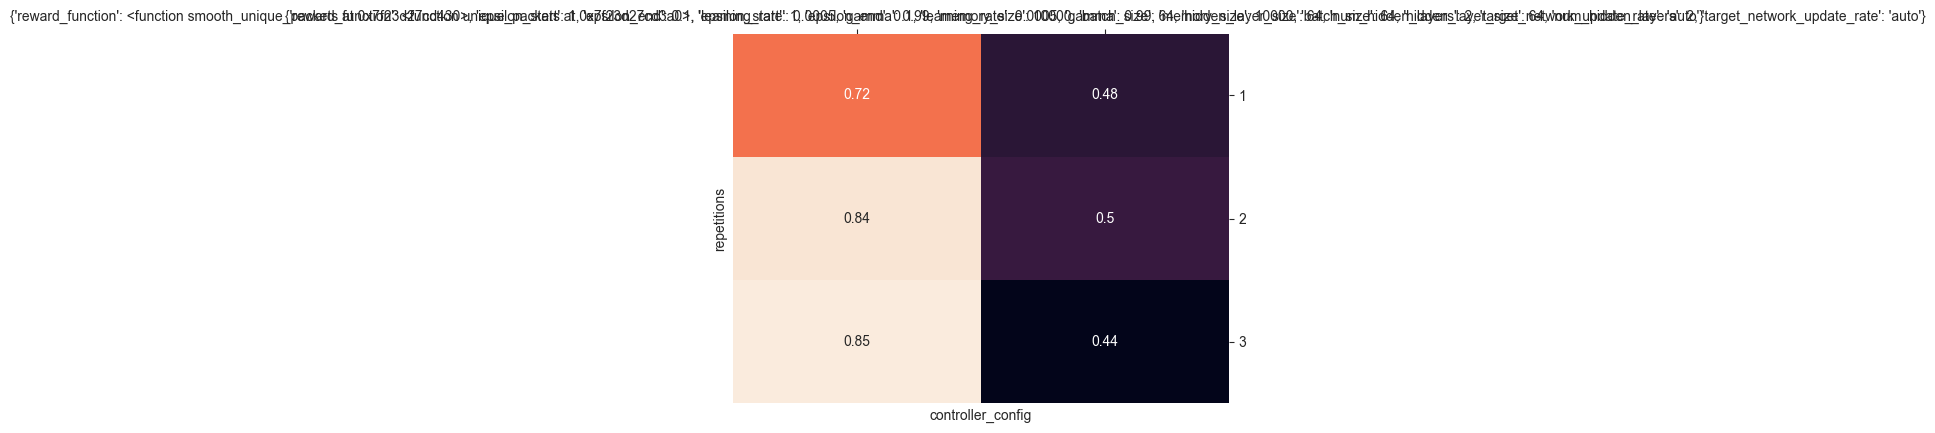

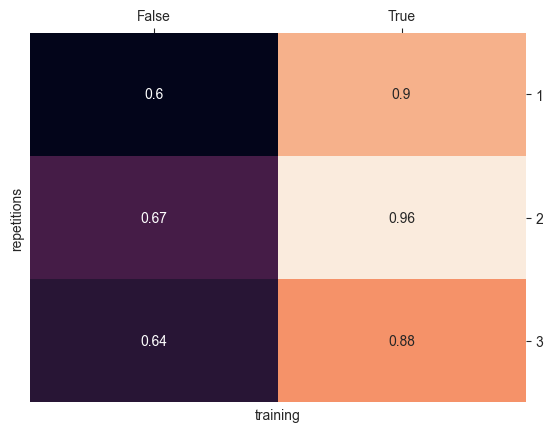

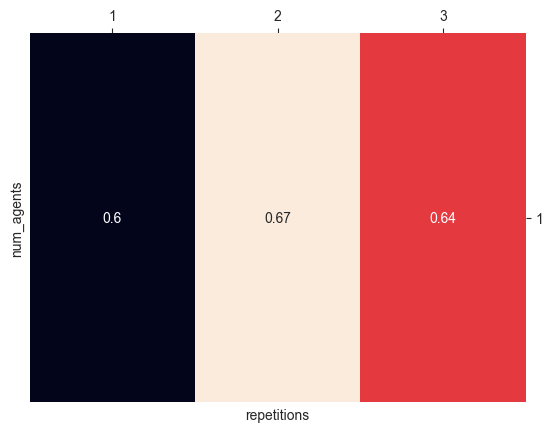

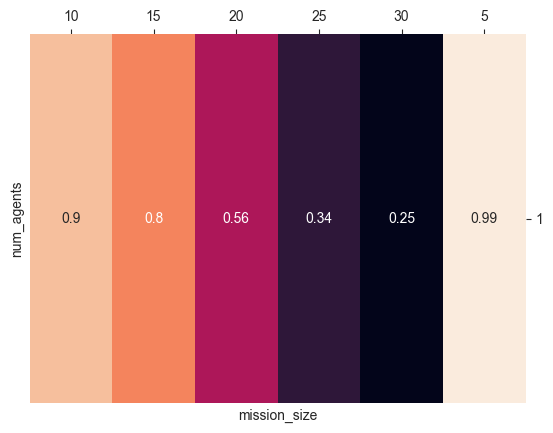

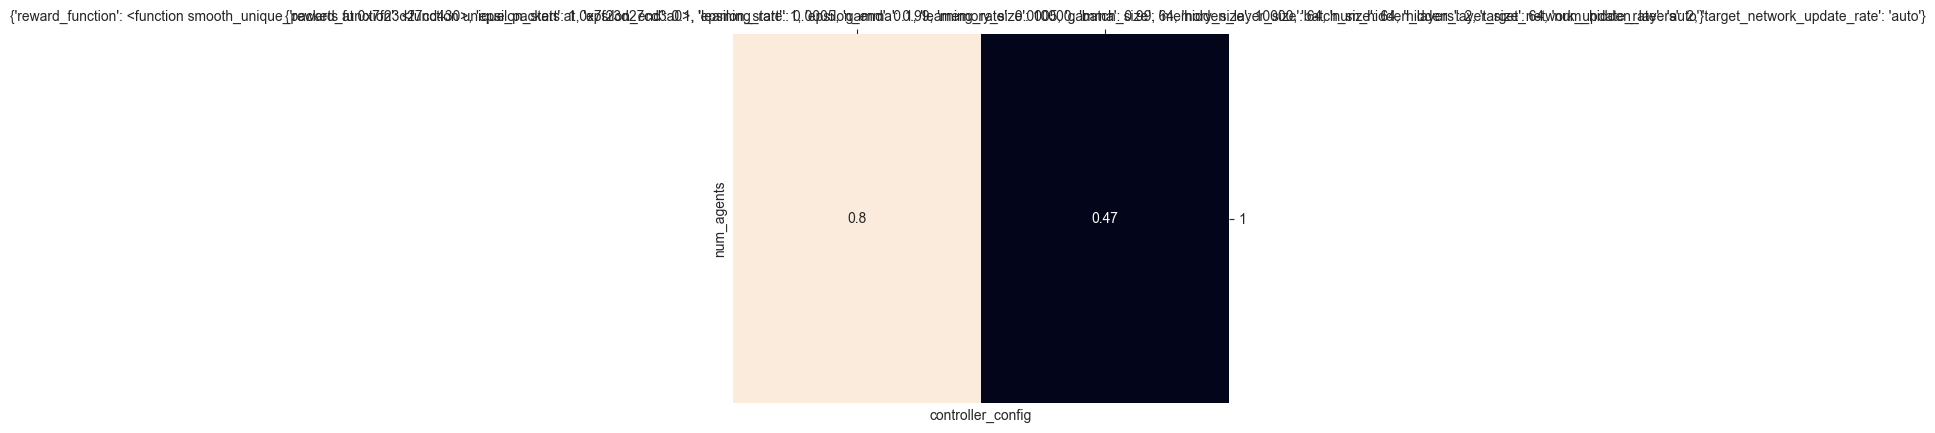

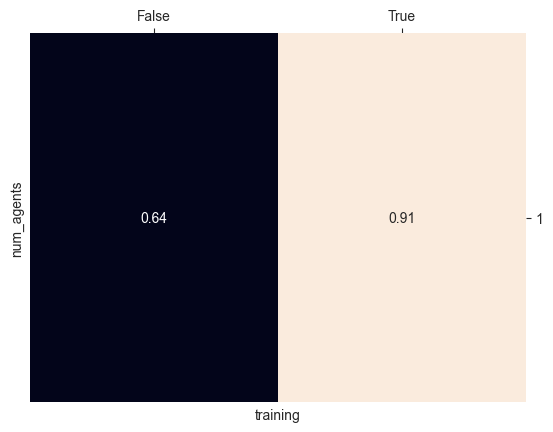

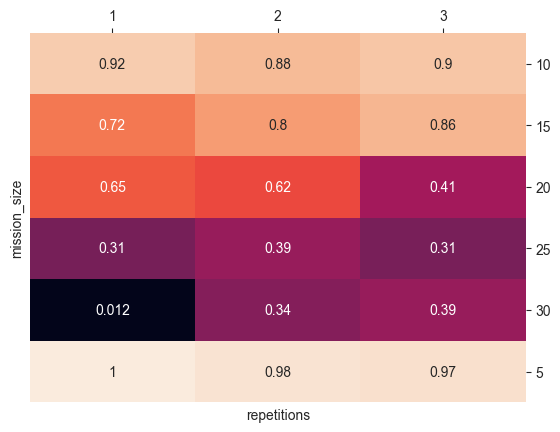

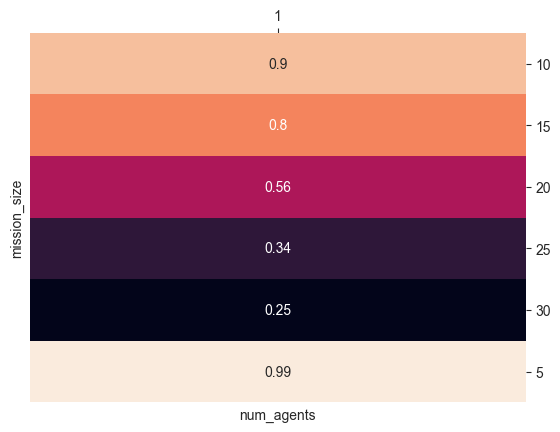

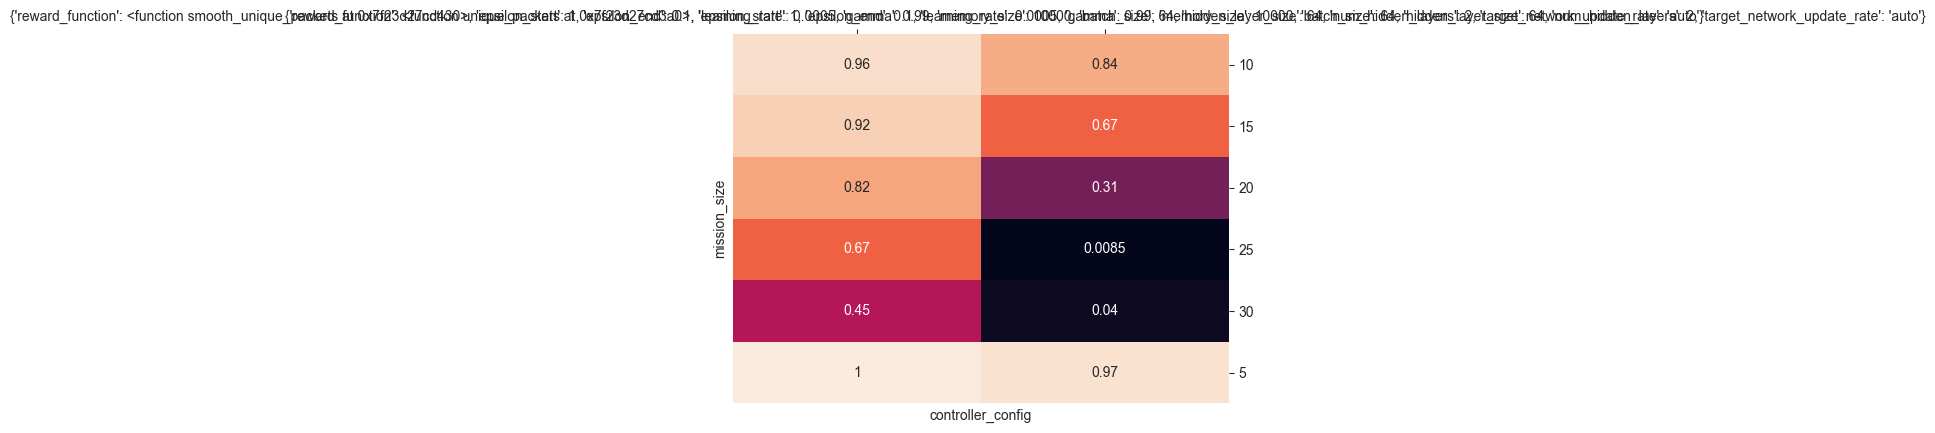

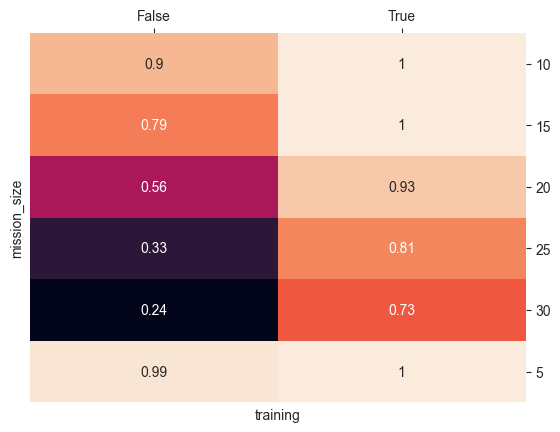

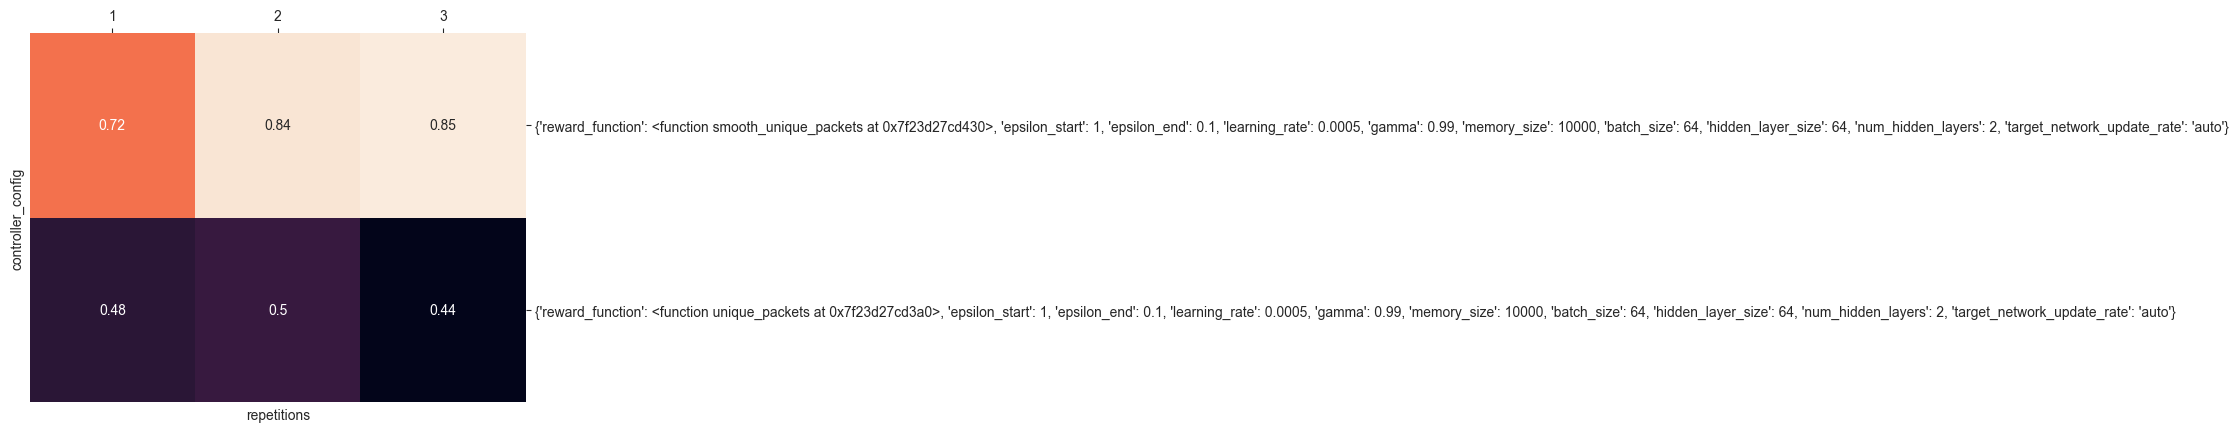

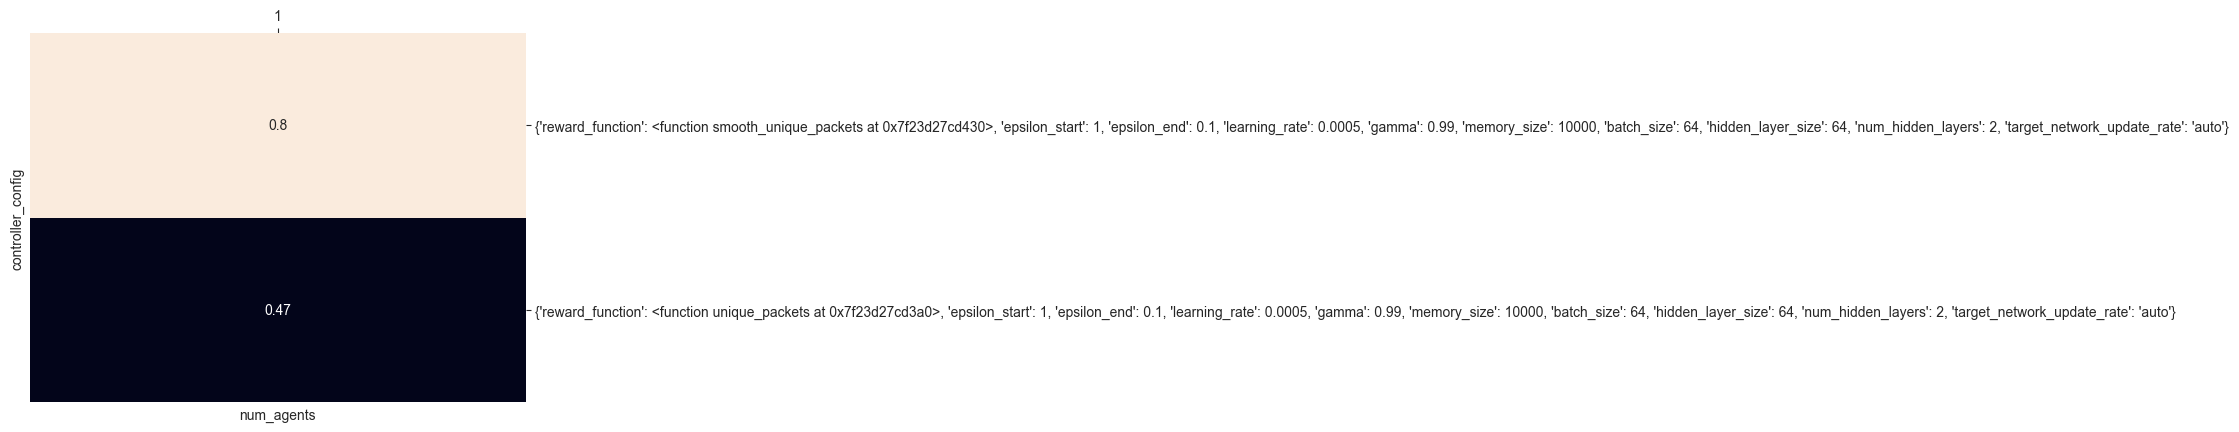

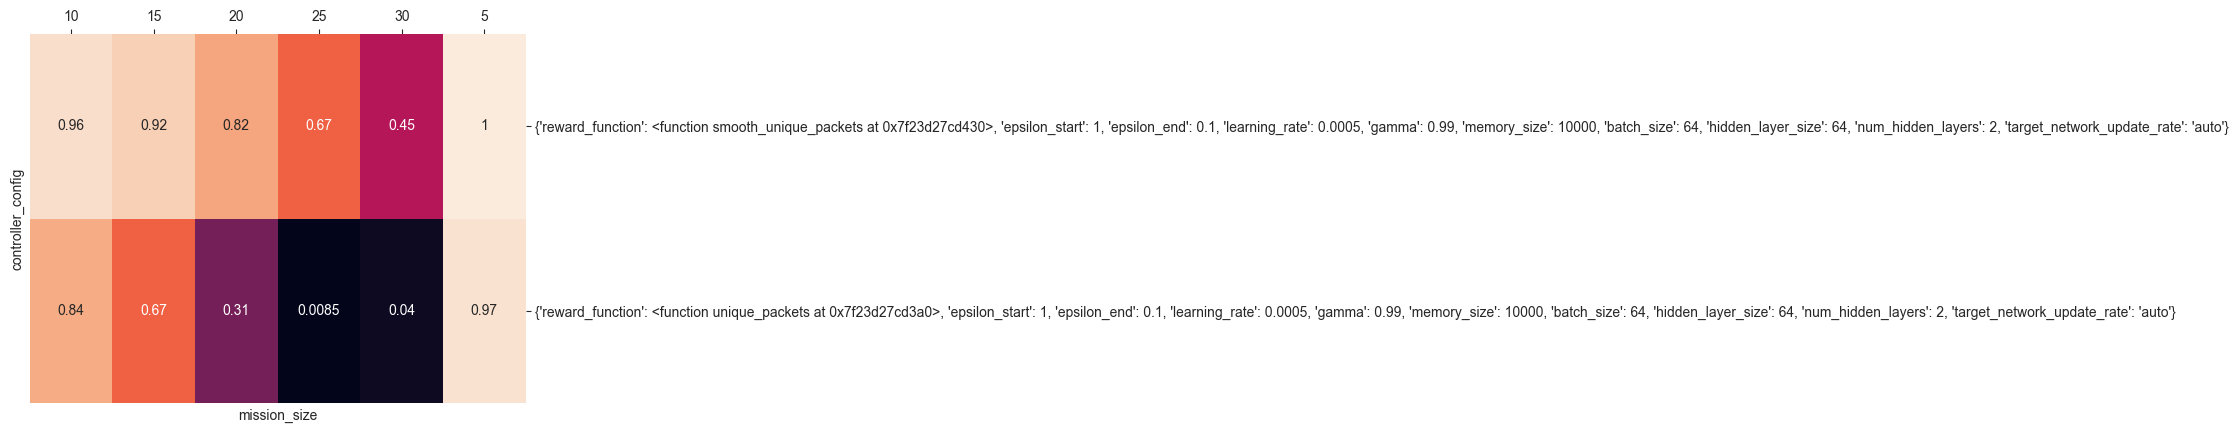

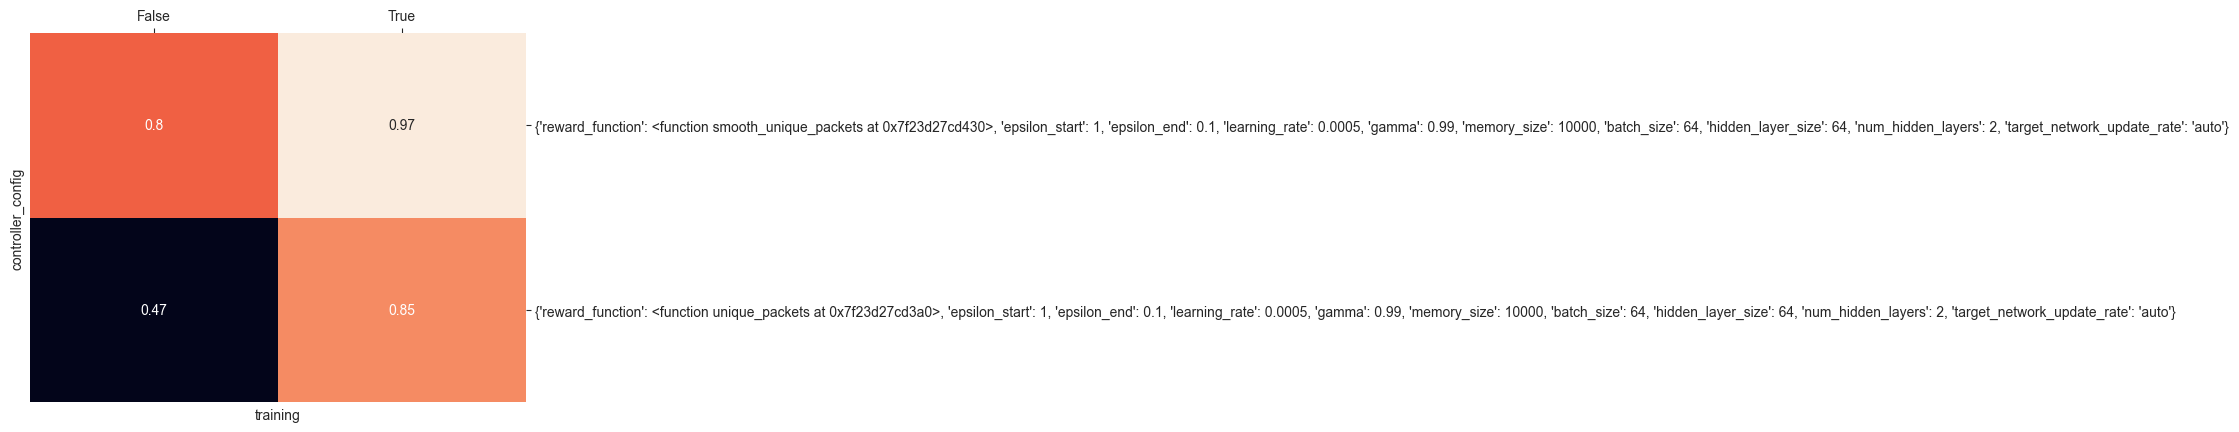

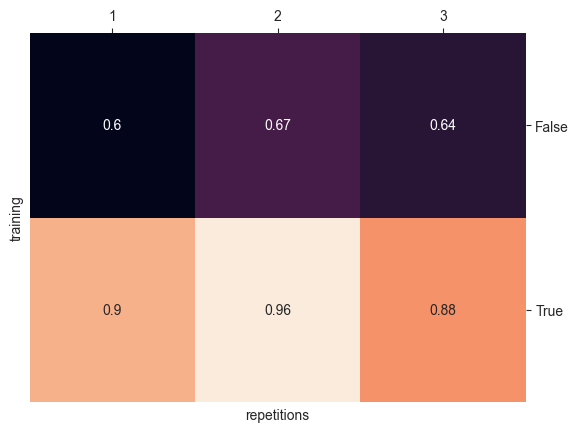

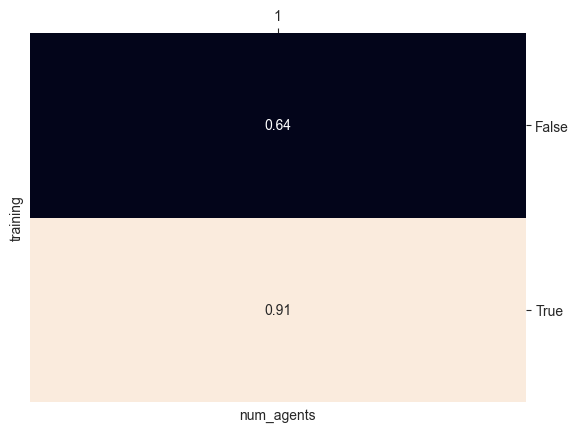

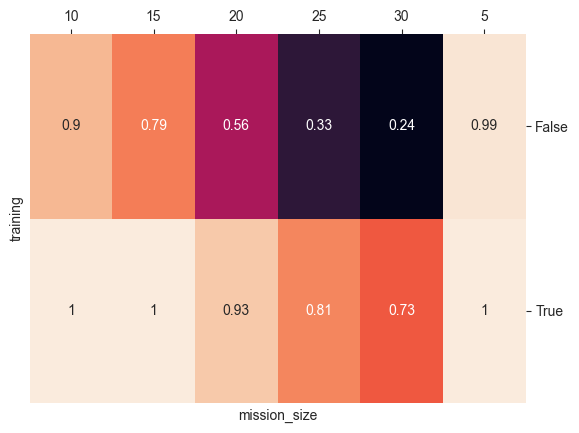

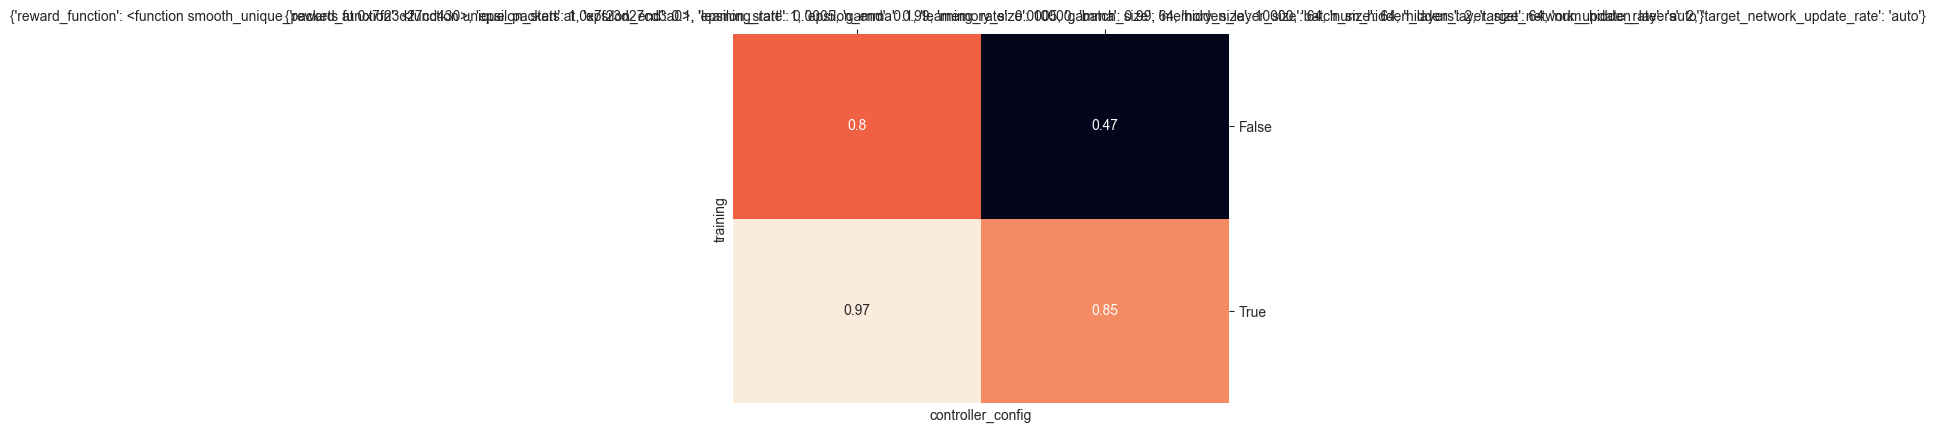

In [178]:
for column in variable_columns:
    for other_column in variable_columns:
        if other_column == column:
            continue
        df = result_df.pivot_table(values='score', columns=other_column, index=column)
        ax = sns.heatmap(df, annot=True, cbar=False)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.tick_params(axis="y", rotation=0)
        plt.show()

In [179]:
for column in variable_columns:
    for value in result_df[column].unique():
        print(f"{column} = {value}".ljust(60) + f"\nAvg Reward: {result_df[result_df[column] == value]['controller.avg_reward'].mean()}\n")
    print("\n")

repetitions = 3                                             
Avg Reward: 0.037444848381649895

repetitions = 1                                             
Avg Reward: 0.03685157536090926

repetitions = 2                                             
Avg Reward: 0.037428167260712436



num_agents = 1                                              
Avg Reward: 0.037241530334423865



mission_size = 5                                            
Avg Reward: 0.12248177800707548

mission_size = 10                                           
Avg Reward: 0.04921935260889821

mission_size = 15                                           
Avg Reward: 0.027683803876267492

mission_size = 20                                           
Avg Reward: 0.01359660494085263

mission_size = 25                                           
Avg Reward: 0.006566882716959292

mission_size = 30                                           
Avg Reward: 0.003900759856490101



controller_config = {'reward_function': <functio

In [180]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['maximum_simulation_steps'])
    if 'target_total_training_time' in result_df:
        result_df['target_total_training_time'] = pd.to_numeric(result_df['target_total_training_time'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])

In [181]:
q_learning_testing = result_df[result_df['training'].str.lower() == 'false']

In [182]:
q_learning_testing['controller_config'].unique()

array(["{'reward_function': <function unique_packets at 0x7f23d27cd3a0>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}",
       "{'reward_function': <function smooth_unique_packets at 0x7f23d27cd430>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}"],
      dtype=object)

# Analysing Q Learning training performance

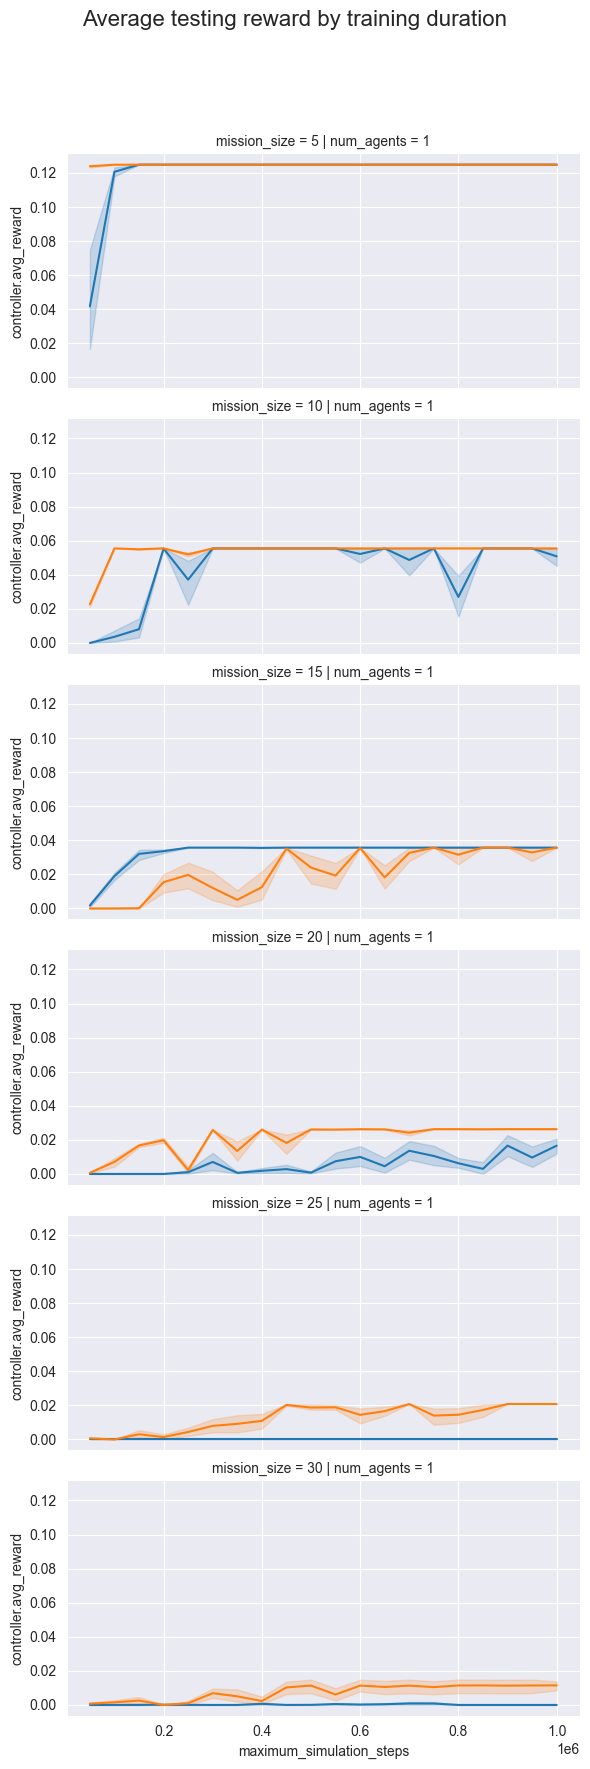

In [189]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='maximum_simulation_steps', y='controller.avg_reward', hue='controller_config')

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average testing reward by training duration', fontsize=16)

plt.show()

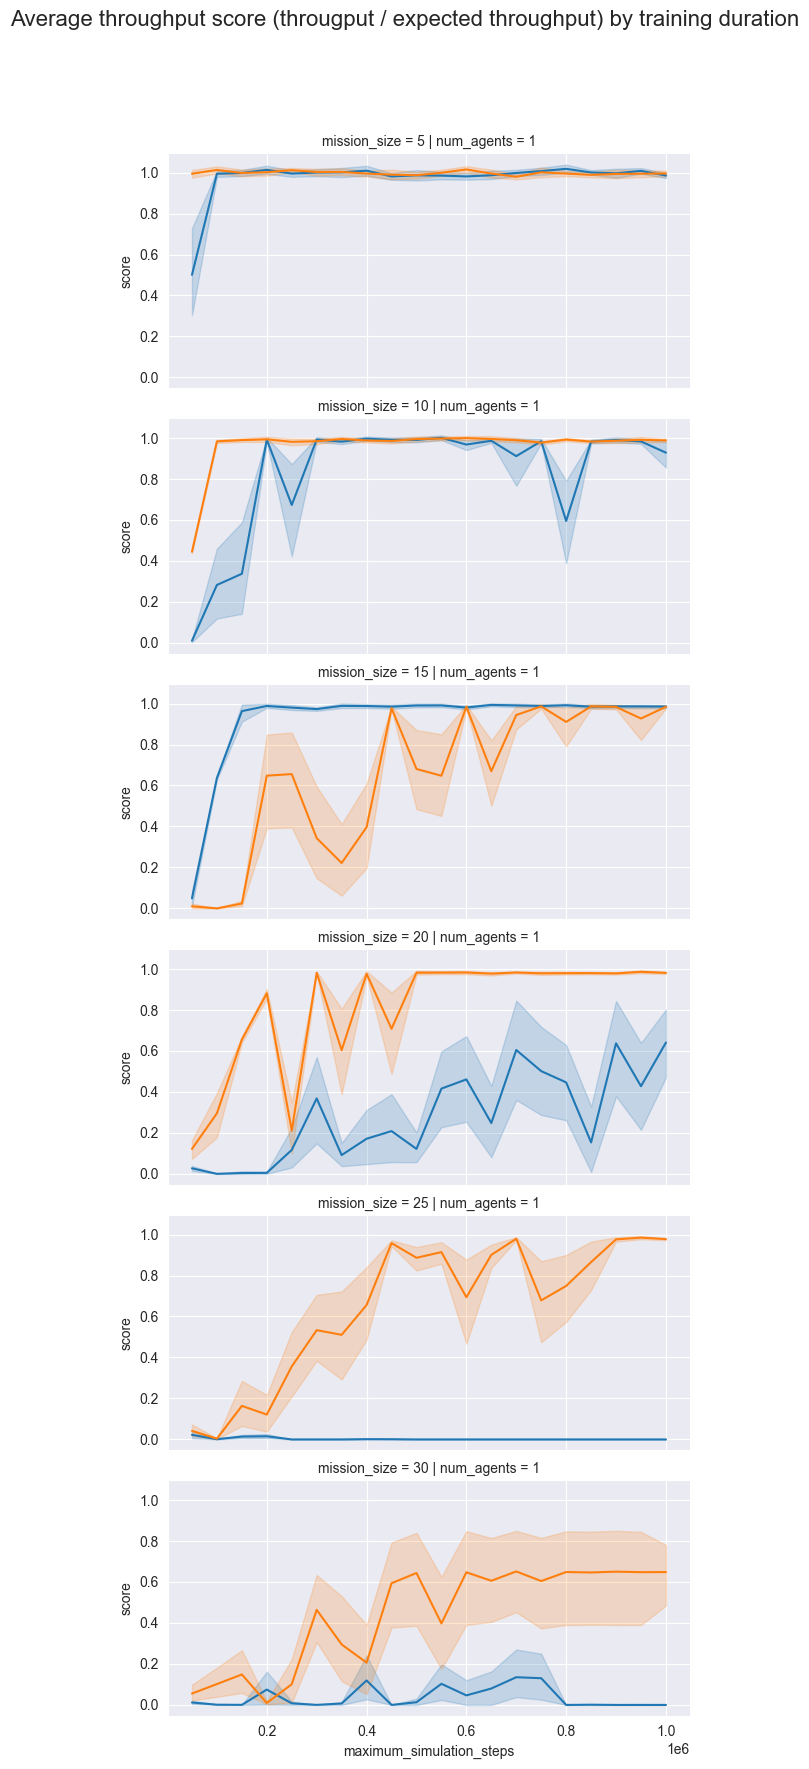

In [190]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='maximum_simulation_steps', y='score', hue='controller_config')

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average throughput score (througput / expected throughput) by training duration', fontsize=16)

plt.show()

In [185]:
avg_rewards = q_learning_testing.groupby('controller_config')['controller.avg_reward'].mean()
top = avg_rewards.sort_values(ascending=False).head(10)
top

controller_config
{'reward_function': <function smooth_unique_packets at 0x7f23d27cd430>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}    0.042244
{'reward_function': <function unique_packets at 0x7f23d27cd3a0>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}           0.032421
Name: controller.avg_reward, dtype: float64

In [186]:
for index, avg in top.iteritems():
    print(index)
    print(avg)
    print("\n\n")

{'reward_function': <function smooth_unique_packets at 0x7f23d27cd430>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}
0.04224370290014867



{'reward_function': <function unique_packets at 0x7f23d27cd3a0>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}
0.03242089947089947





C:\Users\thlam\AppData\Local\Temp\ipykernel_25784\311878167.py:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

